<a href="https://colab.research.google.com/github/MFEshinhyunjin/finefinance/blob/master/Talib_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Global Technical Analysis Source code (Prop Trading)

Author : Jun Kwon, Hyunjin Shin (Kyobo Securities)

* Main Reference : TA-Lib Manual

---
Main Contents
* Data Preprocessing
* Visulaization
* Backtesting
* Optimization (beta ver)
* Machine Learning (beta ver)



---

In [1]:
# install library #
!pip install -U finance_datareader
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
!pip install mpl_finance
!pip install sklearn
!pip install graphviz

--2020-01-20 23:44:02--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-01-20 23:44:03--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://managedway.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-01-20 23:44:03--  https://managedway.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving managedway

In [0]:
#!pip install empyrical
#!pip install zipline
#!pip install pyfolio
#pip install zipline

In [35]:
pip install zipline

     |████████████████████████████████| 2.5MB 2.9MB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
     |████████████████████████████████| 26.3MB 1.3MB/s 
     |████████████████████████████████| 143kB 54.2MB/s 
     |████████████████████████████████| 1.3MB 36.5MB/s 
     |████████████████████████████████| 624kB 46.8MB/s 
     |████████████████████████████████| 471kB 40.9MB/s 
     |████████████████████████████████| 1.1MB 40.1MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
  Created wheel for zipline: filename=zipline-1.3.0-cp36-cp36m-linux_x86_64.whl size=5008357 sha256=b64efb1fbe0c3c9b6216e2899c484bcfbff4b818f74b1fc577bc743589fff659
  Stored in directory: /root/.cache/pip/wheels/a4/d6/67/f303ab028b004bf8e00c05b5b04fba83d8ec238b6547becdb7
  Created wheel for Logbook: filename=Logbook-1.5.3-cp36-cp36m-linux_x86_64.whl size=66380 sha256=10445bd85c08a774db515515194ffb37c8230223279264c88b0907db54a776da
  Stored 

In [36]:
# load library #
import FinanceDataReader as fdr
import talib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_finance
import datetime
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
import graphviz
#import zipline

ImportError: ignored


---
***Technical Analysis Level Function
(TaLib Package)***


---




In [0]:

def TA_level(ticker):
  (ticker_open, ticker_high,ticker_low,ticker_close,ticker_volume)=(ticker["Open"], ticker["High"],
                                                                    ticker["Low"],ticker["Close"],ticker["Volume"])
  ## Overlap Studies Functions ##
  #5일 이동평균
  ta_ma5=pd.DataFrame(talib.MA(ticker_close, timeperiod=5, matype=0))
  ta_ma20=pd.DataFrame(talib.MA(ticker_close, timeperiod=20, matype=0))
  ta_ma60=pd.DataFrame(talib.MA(ticker_close, timeperiod=60, matype=0))
  ta_ma120=pd.DataFrame(talib.MA(ticker_close, timeperiod=120, matype=0))
  ta_ma200 = pd.DataFrame(talib.MA(ticker_close, timeperiod = 200, matype=0))
  #단순이동평균
  ta_sma5=pd.DataFrame(talib.SMA(ticker_close, timeperiod=5))
  ta_sma20=pd.DataFrame(talib.SMA(ticker_close, timeperiod=20))
  ta_sma60=pd.DataFrame(talib.SMA(ticker_close, timeperiod=60))
  ta_sma120=pd.DataFrame(talib.SMA(ticker_close, timeperiod=120))
  ta_sma200 = pd.DataFrame(talib.SMA(ticker_close, timeperiod = 200))
  #지수이동평균
  ta_ema20 = pd.DataFrame(talib.EMA(ticker_close, timeperiod=20))
  ta_ema200 = pd.DataFrame(talib.EMA(ticker_close, timeperiod=200))
  # 추후 5, 10, 20 Ma추가
  #20days, 2sigma Bollinger Band
  ta_upband, ta_midband, ta_lowband = talib.BBANDS(ticker_close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
  # SAR
  ta_sar = pd.DataFrame(talib.SAR(ticker_high, ticker_low, acceleration =0, maximum = 0))

  ## Volatility Indicator ##
  #14일 ATR
  ta_atr = pd.DataFrame(talib.ATR(ticker_high,ticker_low,ticker_close, timeperiod =14))

  ## Momentum Indicator ##
  #Aroon
  #ta_aroondn, ta_aroonup = pd.DataFrame(talib.AROON(ticker_high, ticker_low, timeperiod= 14))
  #14일 adx
  ta_adx=pd.DataFrame(talib.ADX(ticker_high,ticker_low,ticker_close))
  ta_pdi=pd.DataFrame(talib.PLUS_DI(ticker_high,ticker_low,ticker_close))
  ta_mdi=pd.DataFrame(talib.MINUS_DI(ticker_high,ticker_low,ticker_close))
  #14일 cci
  ta_cci=pd.DataFrame(talib.CCI(ticker_high,ticker_low,ticker_close))
  #12MA,26MA 이용 MACD
  ta_macd=pd.DataFrame(talib.MACD(ticker_close)[-1]) 
  #14일 roc
  ta_roc=pd.DataFrame(talib.ROC(ticker_close, timeperiod=10))
  #14일 RSI
  ta_RSI=pd.DataFrame(talib.RSI(ticker_close))
  # Stochastic
  #ta_stochl, ta_stochh = pd.DataFrame(talib.STOCH(ticker_high, ticker_low,
  #                                                ticker_close))  # Stochastic RSI
 # ta_fastk, ta_fastd = pd.DataFrame(talib.STOCHRSI(ticker_close, timeperiod=14, fastk_period=5,
  #                                                 fastd_period = 3, fastd_matype =0))
  # Williams'%R
  ta_willr = pd.DataFrame(talib.WILLR(ticker_high, ticker_low, ticker_close, timeperiod = 14))

  ## Statistic Functions ##
  # beta #
  ta_beta = pd.DataFrame(talib.BETA(ticker_high, ticker_low, timeperiod = 5))
  # Time series forecast #
  ta_tsf = pd.DataFrame(talib.TSF(ticker_close, timeperiod = 14))
 
  ## Target Variables ##
  ta_return = pd.DataFrame(ticker_close.pct_change(1).shift(-1))
  ta_return_dummy = pd.DataFrame(np.where(ta_return > 0, 1, 0))
  ta_return_reg = ta_return

  ## Result ##
  result=pd.concat((ticker_open, ticker_high, ticker_low, ticker_close,ticker_volume,
                    ta_ma5,ta_ma20,ta_ma60,ta_ma120, ta_ma200,
                    ta_sma5, ta_sma20, ta_sma60, ta_sma120, ta_sma200,
                    ta_ema20, ta_ema200, ta_sar, ta_adx, ta_pdi, ta_mdi,
                    ta_macd, ta_RSI, ta_cci, ta_roc, ta_atr, 
                    ta_willr,
                    ta_upband, ta_midband, ta_lowband, ta_beta, ta_tsf,
                    ta_return, ta_return_dummy, ta_return_reg), axis=1)
  result.columns=["Open","High","Low","Close", "Volume","MA5","MA20", "MA60","MA120","MA200",
                  "SMA5", "SMA20", "SMA60", "SMA120", "SMA200", "EMA20", "EMA200", "SAR","ADX",
                  "PDI","MDI",
                  "MACD","RSI","CCI","ROC","ATR",
                  "WillR","UpBand","MidBand","LowBand","Beta","TSF",
                  "Return", "Return_dummy", "Return_reg"]
  
  return result

In [0]:
#* 자산코드와 시작 년도만 바꾸면 됩니다.

# 주요 Ticker Lists from investing.com #
# equity : SPX, N225, NASQ, DAX, KS200
# rates : FGBLH0 (Germany, mar), FLGH0 (UK, mar), TY (Us 10y), TU (US 2y), FV (US 5y)
# rates2 USD EUR GBK US2Y US5Y US10Y
# FX : DX ($), ECM (euro), BPM (pound)
# commodity : GC, HG(copper), PA

# 날짜형식 : 'YYYY' or 'yyyy-mm-dd' 
# , 구분으로 start ~ end

In [0]:
#### Recent around 1 Year Data ####
now = datetime.datetime.now()

# Equity Futures # 
SPX =  TA_level(pd.DataFrame(fdr.DataReader('US500', '2019-01-01')))
N225 = TA_level(pd.DataFrame(fdr.DataReader('JP225', '2019-01-01')))
NASQ = TA_level(pd.DataFrame(fdr.DataReader('NDX', '2019-01-01')))
DAX = TA_level(pd.DataFrame(fdr.DataReader('DE30', '2019-01-01')))
KS200 = TA_level(pd.DataFrame(fdr.DataReader('KS', '2019-01-01')))

# FX & Rates Futues #
USD = TA_level(pd.DataFrame(fdr.DataReader('DX', '2019-01-01')))
EUR = TA_level(pd.DataFrame(fdr.DataReader('ECM', '2019-01-01')))
GBK = TA_level(pd.DataFrame(fdr.DataReader('BPM', '2019-01-01')))
US2Y = TA_level(pd.DataFrame(fdr.DataReader('TU', '2019-01-01')))
US5Y = TA_level(pd.DataFrame(fdr.DataReader('FV', '2019-01-01')))
US10Y = TA_level(pd.DataFrame(fdr.DataReader('TY', '2019-01-01')))

# Commodity Futures #
GCF = TA_level(pd.DataFrame(fdr.DataReader('GC', '2019-01-01'))) #gold
HGF = TA_level(pd.DataFrame(fdr.DataReader('HG', '2019-01-01')))  #copper
PA = TA_level(pd.DataFrame(fdr.DataReader('PA', '2019-01-01')))  #palladium

In [0]:
#### Back Testing in sample Data ####

# Equity Futures # 
SPX =  TA_level(pd.DataFrame(fdr.DataReader('US500', '2017-01-01', '2019-09-30')))
N225 = TA_level(pd.DataFrame(fdr.DataReader('JP225', '2017-01-01', '2019-09-30')))
NASQ = TA_level(pd.DataFrame(fdr.DataReader('NDX', '2017-01-01', '2019-09-30')))
DAX = TA_level(pd.DataFrame(fdr.DataReader('DE30', '2017-01-01', '2019-09-30')))
KS200 = TA_level(pd.DataFrame(fdr.DataReader('KS', '2017-01-01', '2019-09-30')))

# FX & Rates Futues #
USD = TA_level(pd.DataFrame(fdr.DataReader('DX', '2017-01-01', '2019-09-30')))
EUR = TA_level(pd.DataFrame(fdr.DataReader('ECM', '2017-01-01', '2019-09-30')))
GBK = TA_level(pd.DataFrame(fdr.DataReader('BPM', '2017-01-01', '2019-09-30')))
US2Y = TA_level(pd.DataFrame(fdr.DataReader('TU', '2017-01-01', '2019-09-30')))
US5Y = TA_level(pd.DataFrame(fdr.DataReader('FV', '2017-01-01', '2019-09-30')))
US10Y = TA_level(pd.DataFrame(fdr.DataReader('TY', '2017-01-01', '2019-09-30')))

# Commodity Futures #
GCF = TA_level(pd.DataFrame(fdr.DataReader('GC', '2017-01-01', '2019-09-30'))) #gold
HGF = TA_level(pd.DataFrame(fdr.DataReader('HG', '2017-01-01', '2019-09-30')))  #copper
PA = TA_level(pd.DataFrame(fdr.DataReader('PA', '2017-01-01', '2019-09-30')))  #palladium

In [0]:
## Ratio Maker ##
divide_gold = pd.DataFrame(fdr.DataReader('GC', '2019-01-01'))
divide_copper = pd.DataFrame(fdr.DataReader('HG', '2019-01-01'))
divide_spx = pd.DataFrame(fdr.DataReader('US500', '2019-01-01'))
divide_usd = pd.DataFrame(fdr.DataReader('DX', '2019-01-01'))
divide_pa = pd.DataFrame(fdr.DataReader('PA', '2019-01-01'))
divide_gbk = pd.DataFrame(fdr.DataReader('BPM', '2019-01-01'))

sample_ratio_raw_1 = divide_gold / divide_copper # gold / copper
sample_ratio_raw_2 = divide_gold / divide_spx # gold / S&P500 
sample_ratio_raw_3 = divide_gold / divide_usd # gold / dollar
sample_ratio_raw_4 = divide_pa / divide_gbk

gchg =  TA_level(pd.DataFrame(sample_ratio_raw_1))
gcspx =  TA_level(pd.DataFrame(sample_ratio_raw_2))
gcusd =  TA_level(pd.DataFrame(sample_ratio_raw_3))

pagbk = TA_level(pd.DataFrame(sample_ratio_raw_4))
#pagbk

,Open,High,Low,Close,Volume,MA5,MA20,MA60,MA120,MA200,SMA5,SMA20,SMA60,SMA120,SMA200,EMA20,EMA200,MACD,RSI,ADX,CCI,ROC,ATR,UpBand,MidBand,LowBand
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,936.644505,935.929452,935.393039,936.171875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,936.171875,936.812544,942.504158,944.216182,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,946.159937,948.550268,954.018393,948.248659,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,947.949527,976.620533,947.002606,970.314456,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-06,972.150411,976.065702,969.408539,969.163340,NaN,953.622902,NaN,NaN,NaN,NaN,953.622902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-14,1602.489244,1640.029101,1598.420647,1632.710137,0.0,1598.532534,1497.040179,1420.147145,1366.680738,1290.444328,1598.532534,1497.040179,1420.147145,1366.680738,1290.444328,1520.058550,1306.179154,13.216417,83.488014,44.262549,120.082192,11.220083,21.662051,1640.783901,1497.040179,1353.296458
2020-01-15,1633.854646,1674.345630,1627.248962,1675.440613,0.0,1615.930877,1510.081960,1425.234792,1370.653510,1293.587741,1615.930877,1510.081960,1425.234792,1370.653510,1293.587741,1534.856841,1309.853397,15.358410,86.410991,46.780976,135.310247,12.163961,23.478809,1668.158323,1510.081960,1352.005596
2020-01-16,1673.758322,1712.650694,1658.796474,1689.113827,0.0,1636.810578,1523.434829,1430.382533,1374.664830,1296.759194,1636.810578,1523.434829,1430.382533,1374.664830,1296.759194,1549.547983,1313.627133,16.389717,87.192287,49.337156,143.720293,12.276238,25.648481,1694.126727,1523.434829,1352.742930


In [0]:
## For PCA Methods ##

## DataFrame Maker ##
ticker_list = ["US500","JP225"]
df_list = [fdr.DataReader(ticker, '2019-01-01')['Close'] for ticker in ticker_list]
df_list

df = pd.concat(df_list, axis=1)
df.columns = ticker_list
df = df.dropna()
#df
## PCA for staistical arbitrage ##


,US500,JP225
Date,,
2019-01-04,2531.94,19561.96
2019-01-07,2549.69,20038.97
2019-01-08,2574.41,20204.04
2019-01-09,2584.96,20427.06
2019-01-10,2596.64,20163.80
...,...,...
2020-01-10,3265.35,23850.57
2020-01-14,3283.15,24025.17
2020-01-15,3289.30,23916.58


In [0]:

sample_ratio_raw_1 = divide_gold / divide_copper

sample_ratio = GCF['Close'] / HGF['Close']
sample_ratio

In [0]:
# Visualization #
# Concept List #

### Graph Options ###
#1. Close
#2. ADX
#3. Bband + Close
#4. CCI -100 ~ 100. less than -100 blue / larger than 100 red
#5. MACD cross signal arrow
#6. RSI 30, 70 hline, cross signal arrow
#7. ROC 0 hline, cross 0 arrow
#8. ATR

In [0]:
### Sample Graphs ###

# MA Graphs and Strategy #
'''plt.plot()
plt.plot(GCF.index, GCF['Close'], label = 'Close')
plt.plot(GCF.index, GCF['MA5'], label = 'MA5')
plt.plot(GCF.index, GCF['MA20'], label = 'MA20')
plt.plot(GCF.index, GCF['MA60'], label = 'MA60')
plt.plot(GCF.index, GCF['MA120'], label = 'MA120')
plt.plot(GCF.index, GCF['Positions'], label = 'Positions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.axis(secondary_y = 'Positions')
plt.title('Graph : Gold Futures | Moving Average')
plt.legend(loc = "best")
plt.grid()
plt.show()'''

ax = GCF[['Close','MA5', 'MA20']].plot(figsize = (10,6))
plt.title('Graph : Gold Futures / Moving Average')
plt.grid()
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [0]:
### 2. Bollinger Band ###

#"UpBand","MidBand","LowBand"
# Sample
ax_bband = GCF[['Close','UpBand', 'MidBand', 'LowBand']].plot(figsize = (10,6))
plt.title('Graph : Gold Futures / Bollingerband (20,2,c) ')
plt.grid()
ax_bband.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [0]:
### 3. RSI ###

#If GCF['RSI'] > 70:
#    GCF['RSI_signal'] = 1
#elIf GCF['RSI'] < 30:
#    GCF['RSI_signal'] = -1
#else:
#    GCF['RSI_signal'] = 0

# check 
GCF = pd.DataFrame(GCF)
#GCF['RSI_signal'].describe
#
ax_sub_1 = GCF[['Close']].plot(figsize = (10,6))
plt.grid()
plt.title('Graph : Gold Futures / RSI index ')
ax_sub_2 = GCF[['RSI']].plot(figsize = (10,3))
plt.grid()
#plt.axhline(y=30, color='r')
plt.fill_between(GCF.index,GCF['RSI'],70, where=GCF['RSI'] >= 70, facecolor='red', alpha=0.5)
plt.fill_between(GCF.index,GCF['RSI'],30, where=GCF['RSI'] <= 30, facecolor='blue', alpha=0.5)
ax_sub_1.get_legend().set_bbox_to_anchor((0.25, 0.85));
ax_sub_2.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [0]:
GCF.index

In [0]:
### 4. MACD ###
ax_sub_1 = GCF[['Close']].plot(figsize = (10,6))
plt.grid()
plt.title('Graph : Gold Futures / MACD index ')
ax_sub_2 = GCF[['MACD']].plot(figsize = (10,3))
plt.grid()
#plt.axhline(y=(30,70), color='r')
ax_sub_1.get_legend().set_bbox_to_anchor((0.25, 0.85));
ax_sub_2.get_legend().set_bbox_to_anchor((0.25, 0.85));


In [0]:
### 5. ROC ###
ax_sub_1 = GCF[['Close']].plot(figsize = (10,6))
plt.grid()
plt.title('Graph : Gold Futures / ROC index ')
ax_sub_2 = GCF[['ROC']].plot(figsize = (10,3))
plt.grid()
plt.axhline(y=0, color='r')
ax_sub_1.get_legend().set_bbox_to_anchor((0.25, 0.85));
ax_sub_2.get_legend().set_bbox_to_anchor((0.25, 0.85));


In [0]:
### 6. CCI ###
ax_sub_1 = GCF[['Close']].plot(figsize = (10,6))
#ax_sub_1 = pd.DataFrame(ax_sub_1)
plt.grid()
plt.title('Graph : Gold Futures / CCI index ')
ax_sub_2 = GCF[['CCI']].plot(figsize = (10,3))
plt.grid()
#plt.axhline(y=0, color='r')
# 색칠 -100이하 blue, 100이상 red
plt.fill_between(GCF.index, GCF['CCI'],100, where=GCF['CCI'] >= 100, facecolor='red', alpha=0.5)
plt.fill_between(GCF.index, GCF['CCI'],-100, where=GCF['CCI'] <= -100, facecolor='blue', alpha=0.5);
ax_sub_2.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [0]:
### 7 .ADX ###
ax_sub_1 = GCF[['Close']].plot(figsize = (10,6))
plt.grid()
plt.title('Graph : Gold Futures / ADX index ')
ax_sub_2 = GCF[['ADX']].plot(figsize = (10,3))
plt.grid()
plt.axhline(y=30, color='r')
ax_sub_1.get_legend().set_bbox_to_anchor((0.25, 0.85));
ax_sub_2.get_legend().set_bbox_to_anchor((0.25, 0.85));


In [0]:
### 8. ATR ###
ax_sub_1 = GCF[['Close']].plot(figsize = (10,6))
plt.grid()
plt.title('Graph : Gold Futures / ATR index ')
ax_sub_2 = GCF[['ATR']].plot(figsize = (10,3))
plt.grid()
#plt.axhline(y=30, color='r')
ax_sub_1.get_legend().set_bbox_to_anchor((0.25, 0.85));
ax_sub_2.get_legend().set_bbox_to_anchor((0.25, 0.85));


In [0]:
#### Results Code ####

# 미비점 :
## 그래프 제목에 문자열 변수화해서 제목넣기 ##
## legend 위치 보강 ##
## 색칠 깔끔하게하기

def graph_result(ticker, start_date, end_date = now):
  # MA
  ticker = ticker[start_date:end_date]

  ax_0 = ticker[['Close']].plot(figsize = (10,6))
  plt.title('Graph : Close')
  plt.grid()
  ax_0.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.show()

  # MA #
  #ticker_name = '%c '%(str_ticker) #'%c '%(charac(ticker))
  ax_1 = ticker[['Close', 'SMA5', 'SMA20']].plot(figsize = (10,6))
  plt.title('Graph : Simple Moving Average')
  plt.grid()
  ax_1.get_legend().set_bbox_to_anchor((0.25, 0.85))
 # plt.fill_between(ticker.index, ticker['SMA5'],ticker['SMA20'], where=ticker['SMA5'] >= ticker['SMA20'], facecolor='blue', alpha=0.5)
  plt.show()

  # Volume #
  fig = plt.figure(figsize = (10,2))
  vol = plt.bar(ticker.index, ticker['Volume'])
  plt.grid
  #vol.plot(figsize=(10,2))
  plt.title('Graph : Volume')
  plt.show()

  # BBand
  ax_2 = ticker[['Close','UpBand', 'MidBand', 'LowBand']].plot(figsize = (10,6))
  plt.title('Graph : Bollingerband (20,2,c) ')
  ax_2.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.grid()
  plt.show()  

  # RSI
  #ax_sub_3 = ticker[['Close']].plot(figsize = (10,6))
  ax_sub_4 = ticker[['RSI']].plot(figsize = (10,3))
  #plt.grid()
  #plt.axhline(y=30, color='r')
  plt.title('Graph : RSI index ')
  plt.fill_between(ticker.index,ticker['RSI'],70, where=ticker['RSI'] >= 70, facecolor='red', alpha=0.5)
  plt.fill_between(ticker.index,ticker['RSI'],30, where=ticker['RSI'] <= 30, facecolor='blue', alpha=0.5)
  #ax_sub_3.get_legend().set_bbox_to_anchor((0.25, 0.85));
  ax_sub_4.get_legend().set_bbox_to_anchor((0.25, 0.85));
  plt.grid()
  plt.show()
  
  # MACD
  #ax_sub_5 = ticker[['Close']].plot(figsize = (10,6))
  ax_sub_6 = ticker[['MACD']].plot(figsize = (10,3))
  plt.title('Graph : MACD index ')
  #plt.axhline(y=(30,70), color='r')
 # ax_sub_5.get_legend().set_bbox_to_anchor((0.25, 0.85));
  ax_sub_6.get_legend().set_bbox_to_anchor((0.25, 0.85));
  plt.grid()
  plt.show()

  ### 5. ROC ###
  #ax_sub_7 = ticker[['Close']].plot(figsize = (10,6))
  ax_sub_8 = ticker[['ROC']].plot(figsize = (10,3))
  plt.title('Graph : ROC index ')
  plt.axhline(y=0, color='r')
  #ax_sub_7.get_legend().set_bbox_to_anchor((0.25, 0.85));
  ax_sub_8.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.grid()
  plt.show()


  ### 6. CCI ###
  #ax_sub_9 = ticker[['Close']].plot(figsize = (10,6))
  #ax_sub_1 = pd.DataFrame(ax_sub_1)
  #plt.grid()
  ax_sub_10 = ticker[['CCI']].plot(figsize = (10,3))
  plt.title('Graph : CCI index ')
  #plt.grid()
  #plt.axhline(y=0, color='r')
  # 색칠 -100이하 blue, 100이상 red
  plt.fill_between(ticker.index, ticker['CCI'],100, where=ticker['CCI'] >= 100, facecolor='red', alpha=0.5)
  plt.fill_between(ticker.index, ticker['CCI'],-100, where=ticker['CCI'] <= -100, facecolor='blue', alpha=0.5)
  plt.grid()
  ax_sub_10.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.show()

  ### 7 .ADX ###
  #ax_sub_11 = ticker[['Close']].plot(figsize = (10,6))
  #plt.grid()
  ax_sub_12 = ticker[['ADX']].plot(figsize = (10,3))
  plt.title('Graph : ADX index ')
  plt.axhline(y=30, color='r')
  #ax_sub_11.get_legend().set_bbox_to_anchor((0.25, 0.85));
  plt.grid()
  ax_sub_12.get_legend()
  plt.show()

  ### 8. ATR ###
  #ax_sub_13 = ticker[['Close']].plot(figsize = (10,6))
  #plt.grid()
  ax_sub_14 = ticker[['ATR']].plot(figsize = (10,3))
  plt.title('Graph : ATR index ')
  #plt.axhline(y=30, color='r')
  #ax_sub_13.get_legend().set_bbox_to_anchor((0.25, 0.85));
  ax_sub_14.get_legend().set_bbox_to_anchor((0.25, 0.85));
  plt.grid()
  plt.show()

#-----------------------------------------------------------------------------#
  ### Additional Analysis Avaialbe ###



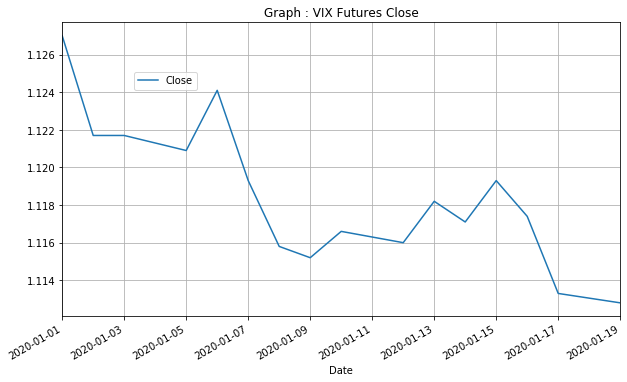

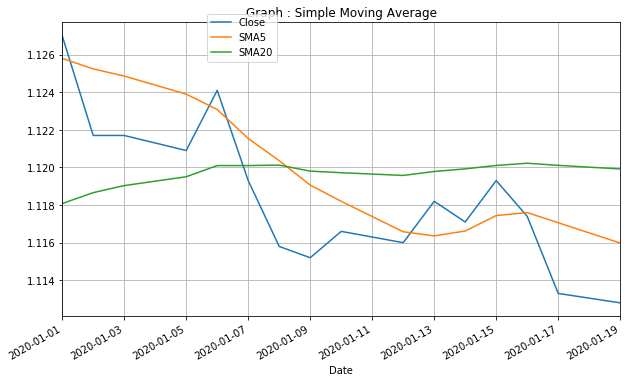

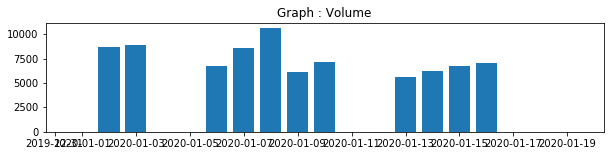

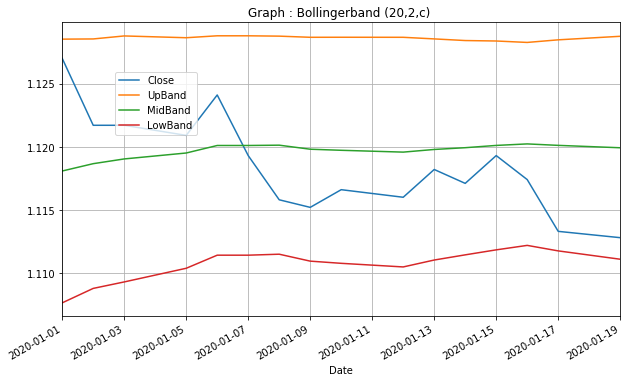

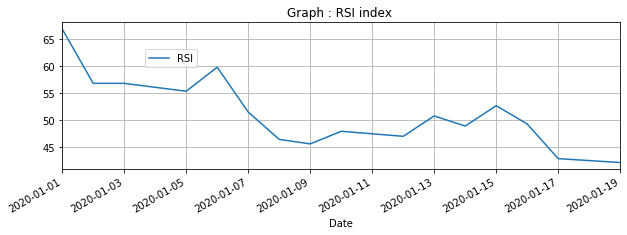

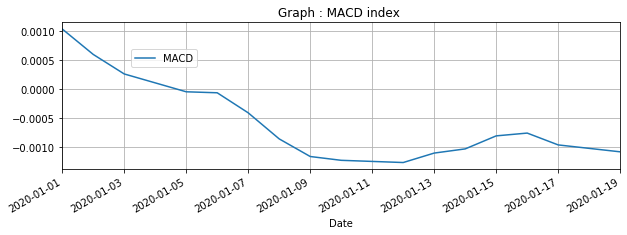

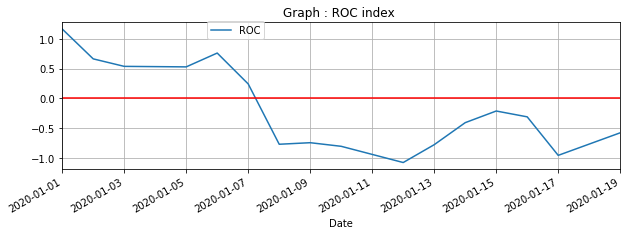

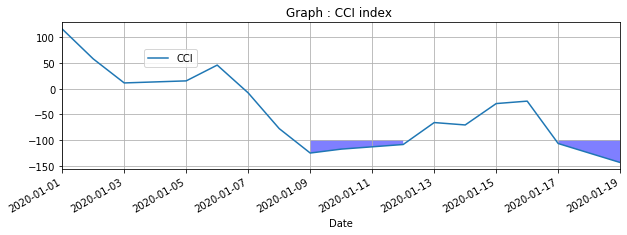

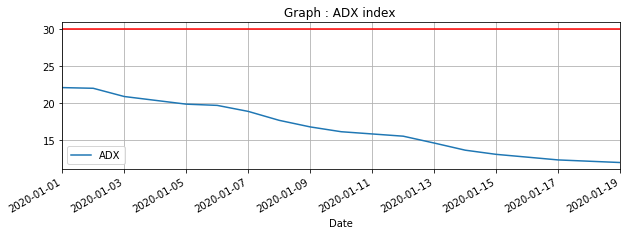

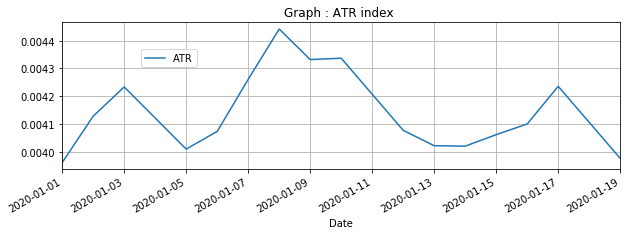

In [0]:
graph_result(EUR, '2020-01-01')

In [0]:

# 미비점 :
## 그래프 제목에 문자열 변수화해서 제목넣기 ##

def VX_graph_result(ticker, start_date):
  # MA
  ticker = ticker[start_date:]

  ax_0 = ticker[['Close']].plot(figsize = (10,6))
  plt.title('Graph : VIX Futures Close')
  plt.grid()
  ax_0.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.show()

  # MA #
  #ticker_name = '%c '%(str_ticker) #'%c '%(charac(ticker))
  ax_1 = ticker[['Close', 'SMA5', 'SMA20']].plot(figsize = (10,6))
  plt.title('Graph : VIX Futures Simple Moving Average')
  plt.grid()
  ax_1.get_legend().set_bbox_to_anchor((0.25, 0.85))
 # plt.fill_between(ticker.index, ticker['SMA5'],ticker['SMA20'], where=ticker['SMA5'] >= ticker['SMA20'], facecolor='blue', alpha=0.5)
  plt.show()

  # Volume #
  fig = plt.figure(figsize = (10,2))
  vol = plt.bar(ticker.index, ticker['Volume'])
  plt.grid
  #vol.plot(figsize=(10,2))
  plt.title('Graph : Volume')
  plt.show()

  # BBand
  ax_2 = ticker[['Close','UpBand', 'MidBand', 'LowBand']].plot(figsize = (10,6))
  plt.title('Graph : VIX Futures Bollingerband (20,2,c) ')
  ax_2.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.grid()
  plt.show()  

  # RSI
  #ax_sub_3 = ticker[['Close']].plot(figsize = (10,6))
  ax_sub_4 = ticker[['RSI']].plot(figsize = (10,3))
  #plt.grid()
  #plt.axhline(y=30, color='r')
  plt.title('Graph : VIX Futures RSI index ')
  plt.fill_between(ticker.index,ticker['RSI'],70, where=ticker['RSI'] >= 70, facecolor='red', alpha=0.5)
  plt.fill_between(ticker.index,ticker['RSI'],30, where=ticker['RSI'] <= 30, facecolor='blue', alpha=0.5)
  #ax_sub_3.get_legend().set_bbox_to_anchor((0.25, 0.85));
  ax_sub_4.get_legend().set_bbox_to_anchor((0.25, 0.85));
  plt.grid()
  plt.show()
  
  # MACD
  #ax_sub_5 = ticker[['Close']].plot(figsize = (10,6))
  ax_sub_6 = ticker[['MACD']].plot(figsize = (10,3))
  plt.title('Graph : VIX Futures MACD index ')
  #plt.axhline(y=(30,70), color='r')
 # ax_sub_5.get_legend().set_bbox_to_anchor((0.25, 0.85));
  ax_sub_6.get_legend().set_bbox_to_anchor((0.25, 0.85));
  plt.grid()
  plt.show()

  ### 5. ROC ###
  #ax_sub_7 = ticker[['Close']].plot(figsize = (10,6))
  ax_sub_8 = ticker[['ROC']].plot(figsize = (10,3))
  plt.title('Graph : VIX Futures ROC index ')
  plt.axhline(y=0, color='r')
  #ax_sub_7.get_legend().set_bbox_to_anchor((0.25, 0.85));
  ax_sub_8.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.grid()
  plt.show()


  ### 6. CCI ###
  #ax_sub_9 = ticker[['Close']].plot(figsize = (10,6))
  #ax_sub_1 = pd.DataFrame(ax_sub_1)
  #plt.grid()
  ax_sub_10 = ticker[['CCI']].plot(figsize = (10,3))
  plt.title('Graph : VIX Futures CCI index ')
  #plt.grid()
  #plt.axhline(y=0, color='r')
  # 색칠 -100이하 blue, 100이상 red
  plt.fill_between(ticker.index, ticker['CCI'],100, where=ticker['CCI'] >= 100, facecolor='red', alpha=0.5)
  plt.fill_between(ticker.index, ticker['CCI'],-100, where=ticker['CCI'] <= -100, facecolor='blue', alpha=0.5)
  plt.grid()
  ax_sub_10.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.show()

  ### 7 .ADX ###
  #ax_sub_11 = ticker[['Close']].plot(figsize = (10,6))
  #plt.grid()
  ax_sub_12 = ticker[['ADX']].plot(figsize = (10,3))
  plt.title('Graph : VIX Futures ADX index ')
  plt.axhline(y=30, color='r')
  #ax_sub_11.get_legend().set_bbox_to_anchor((0.25, 0.85));
  plt.grid()
  ax_sub_12.get_legend()
  plt.show()

  ### 8. ATR ###
  #ax_sub_13 = ticker[['Close']].plot(figsize = (10,6))
  #plt.grid()
  ax_sub_14 = ticker[['ATR']].plot(figsize = (10,3))
  plt.title('Graph : VIX Futures ATR index ')
  #plt.axhline(y=30, color='r')
  #ax_sub_13.get_legend().set_bbox_to_anchor((0.25, 0.85));
  ax_sub_14.get_legend().set_bbox_to_anchor((0.25, 0.85));
  plt.grid()
  plt.show()

#-----------------------------------------------------------------------------#
  ### Additional Analysis Avaialbe ###



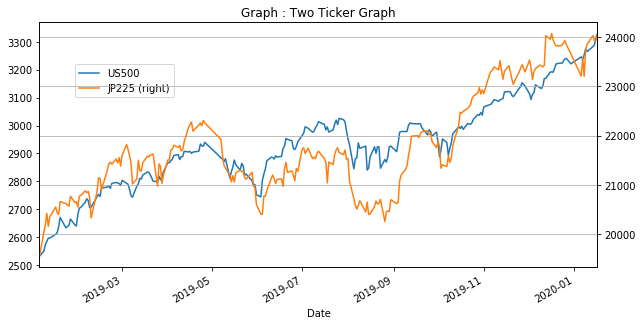

In [0]:
# Two Asset Graph #

## DataFrame Maker ##
ticker_list = ["US500","JP225"]
df_list = [fdr.DataReader(ticker, '2019-01-01')['Close'] for ticker in ticker_list]
df_list

df = pd.concat(df_list, axis=1)
df.columns = ticker_list
df = df.dropna()
#df

def corr_graph_result(ticker,ticker2, start_date):
  corrdf = df[start_date:]

  ax_0 = corrdf.plot(secondary_y = ticker2, figsize = (10,5))
  plt.title('Graph : Two Ticker Graph')
  plt.grid()
  ax_0.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.show()

corr_graph_result('US500','JP225', '2019-01-01')

In [0]:
EUR

,Open,High,Low,Close,Volume,MA5,MA20,MA60,MA120,MA200,SMA5,SMA20,SMA60,SMA120,SMA200,EMA20,EMA200,MACD,RSI,ADX,CCI,ROC,ATR,UpBand,MidBand,LowBand
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1.1538,1.1540,1.1533,1.1534,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1.1537,1.1570,1.1396,1.1414,18870.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,1.1416,1.1480,1.1376,1.1461,18950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,1.1463,1.1487,1.1413,1.1467,17210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-06,1.1471,1.1480,1.1465,1.1478,0.0,1.14708,NaN,NaN,NaN,NaN,1.14708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-14,1.1179,1.1187,1.1147,1.1171,6230.0,1.11662,1.119925,1.112323,1.110116,1.116264,1.11662,1.119925,1.112323,1.110116,1.116264,1.118316,1.117375,-0.001024,48.930034,13.613184,-70.440252,-0.410092,0.004020,1.128410,1.119925,1.111440
2020-01-15,1.1170,1.1206,1.1160,1.1193,6700.0,1.11744,1.120105,1.112483,1.110197,1.116254,1.11744,1.120105,1.112483,1.110197,1.116254,1.118410,1.117394,-0.000800,52.675274,13.047381,-28.927203,-0.213961,0.004061,1.128374,1.120105,1.111836
2020-01-16,1.1192,1.1212,1.1166,1.1174,7020.0,1.11760,1.120225,1.112652,1.110288,1.116249,1.11760,1.120225,1.112652,1.110288,1.116249,1.118314,1.117394,-0.000752,49.311855,12.671969,-24.198368,-0.312249,0.004100,1.128261,1.120225,1.112189


AttributeError: ignored

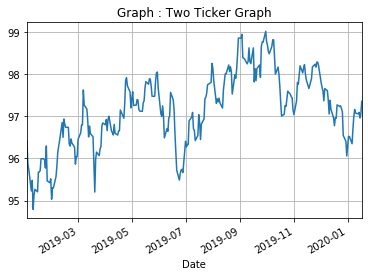

In [0]:
corr_graph_result(USD,EUR,'2019-01-01')

In [0]:
VIX =  TA_level(pd.DataFrame(fdr.DataReader('VX', '2019-01-01')))
VX_graph_result(VIX, '2020-01-01')

In [0]:
#graph_result(GCF, '2019-12-18')

TypeError: ignored

In [0]:
graph_result(GBK, '2019-12-18')

In [0]:
graph_result(EUR, '2020-01-02')

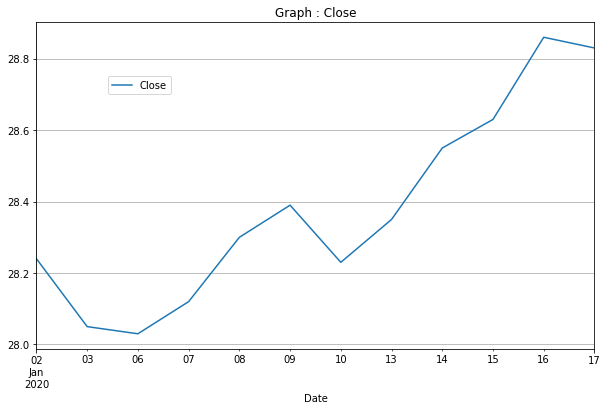

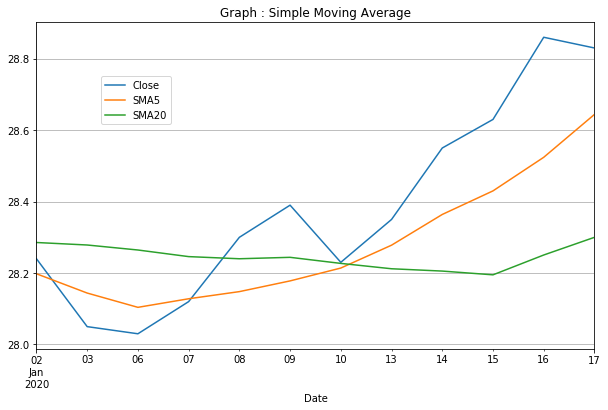

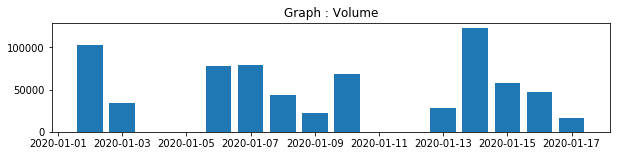

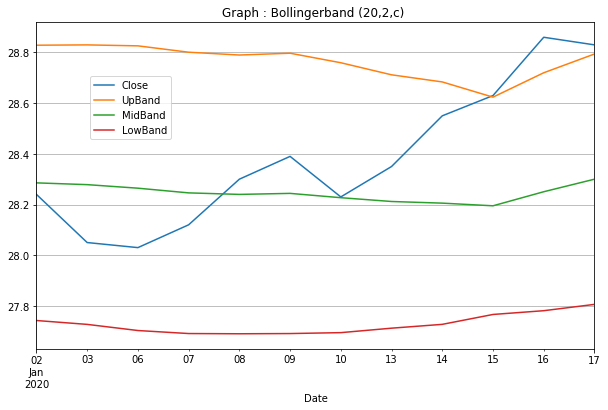

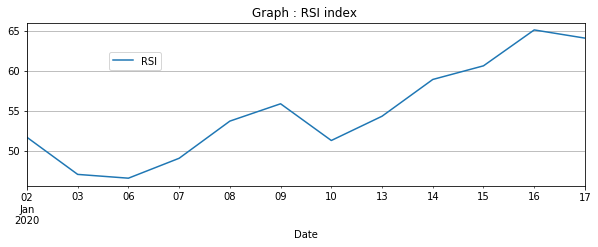

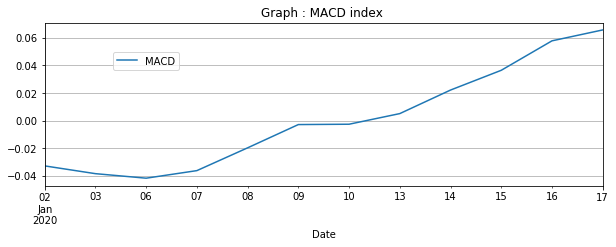

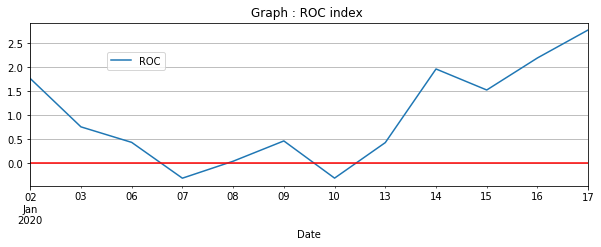

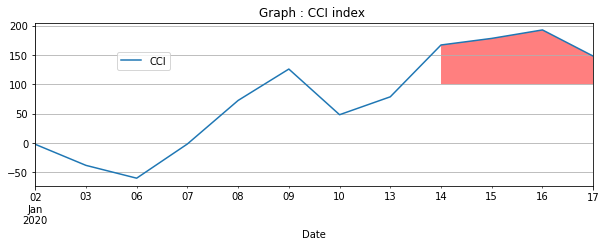

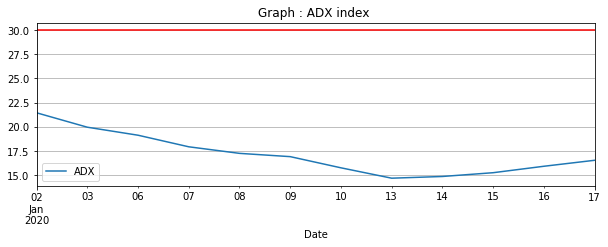

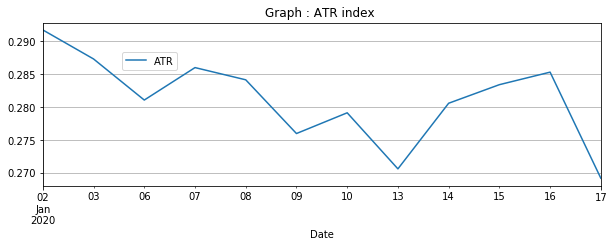

In [0]:
graph_result(US10Y, '2020-01-01')

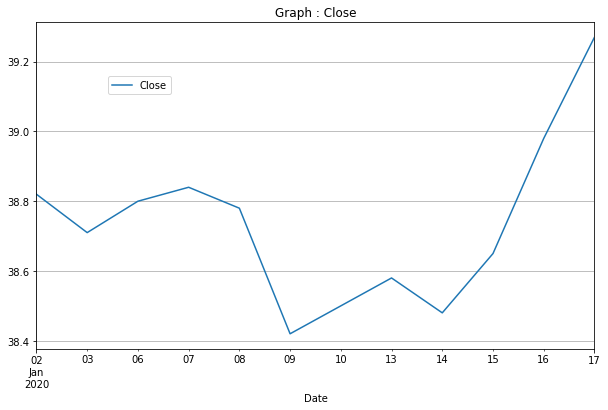

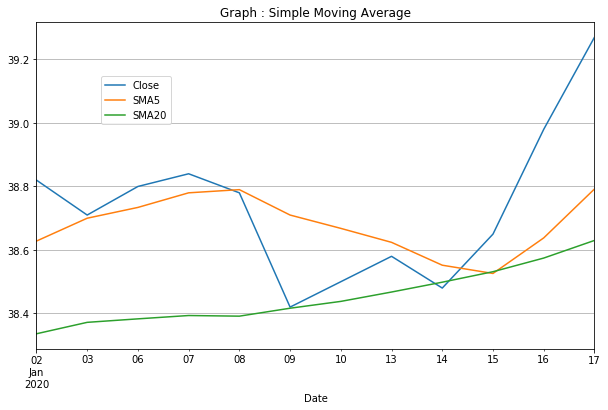

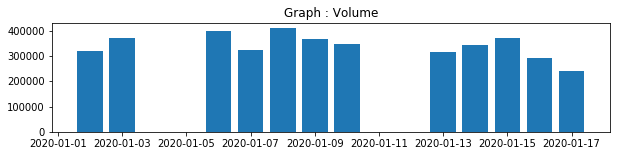

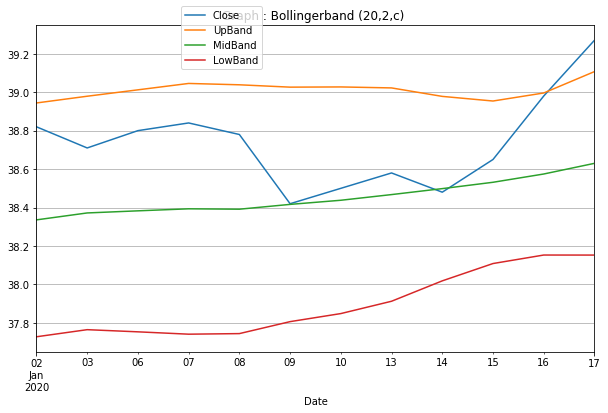

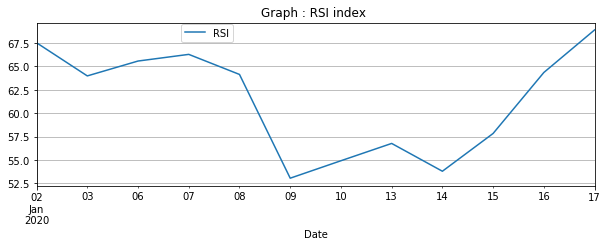

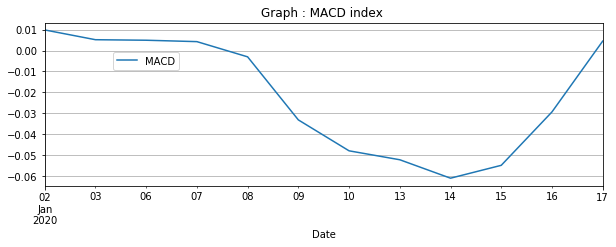

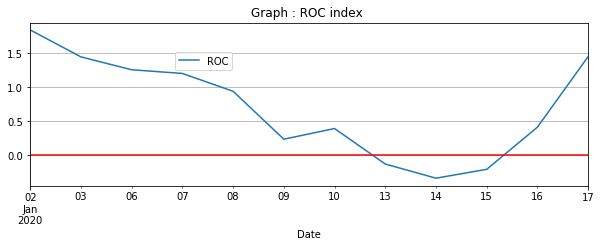

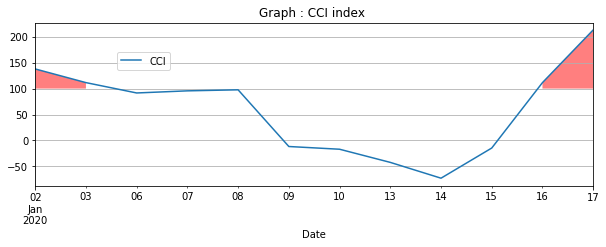

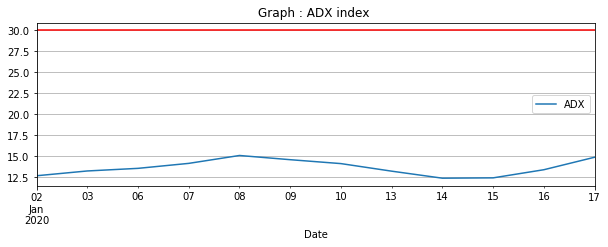

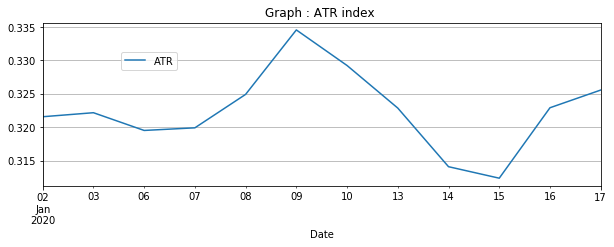

In [0]:
graph_result(US2Y, '2020-01-01')



---



" Strategy "



---



---



---

Strategy 1. SMA BreakThrough Strategy 


---



---



---



In [0]:
#SMA_Strategy(GCF)
def backtest(ticker, strategy, ptc = 0):
  #risk = []
  ticker['strategy_tc'] = np.where(ticker[strategy].diff() !=0, ticker[strategy]-ptc, ticker[strategy])
  for lev in [10,20,30,40,50]:
    label = 'lstrategy_tc_%d' % lev
    ticker[label] = ticker['strategy_tc'] * lev
  equity = 10000
  risk = pd.DataFrame(ticker['lstrategy_tc_30'])
  risk['equity'] = risk['lstrategy_tc_30'].cumsum().apply(np.exp)*equity
  risk['cummax'] = risk['equity'].cummax()
  risk['drawdown'] = risk['cummax'] - risk['equity']
  max_drawdown = risk['drawdown'].max()
  t_max = risk['drawdown'].idxmax()
  return max_drawdown, t_max
  
backtest(GCF, 'SMA_Strategy_1')

In [0]:
### SMA Strategy ###
def get_mdd(x):
  arr_v = np.array(x)
  peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
  peak_upper = np.argmax(arr_v[:peak_lower])
  return (arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper]

def SMA_Strategy(ticker):
    ticker['Returns'] = np.log(ticker['Close'] / ticker['Close'].shift(1))
    ticker['SMA_Strategy'] = np.where((ticker['SMA5'] > ticker['SMA120']) 
    & (ticker['SMA20'] > ticker['SMA60']) & (ticker['SMA5']>ticker['SMA60']),1,-1)
  #  ticker['SMA_Strategy_2'] = np.where(ticker['SMA20'] > ticker['SMA60'],1,-1)
  #  ticker['SMA_Strategy_3'] = np.where(ticker['SMA60'] > ticker['SMA120'],1,-1)
  #  ticker['SMA_returns_1'] = ticker['SMA_Strategy_1'].shift(1) * ticker['Returns']
  #  ticker['SMA_returns_2'] = ticker['SMA_Strategy_2'].shift(1) * ticker['Returns']
  #  ticker['SMA_returns_3'] = ticker['SMA_Strategy_3'].shift(1) * ticker['Returns']
    ticker['SMA_returns'] = ticker['SMA_Strategy'].shift(1) * ticker['Returns']
    ticker['cumms'] = np.exp(ticker['Returns'].sum())
   # SMA_cumms_1 = np.exp(ticker['SMA_returns_1'].sum())
   # SMA_cumms_2 = np.exp(ticker['SMA_returns_2'].sum())
   # SMA_cumms_3 = np.exp(ticker['SMA_returns_3'].sum())
    SMA_cumms_4 = np.exp(ticker['SMA_returns'].sum())
   # SMA_vol_1 = ticker['SMA_returns_1'].std() * 252 ** 0.5
   # SMA_vol_2 = ticker['SMA_returns_2'].std() * 252 ** 0.5
    #SMA_vol_3 = ticker['SMA_returns_3'].std() * 252 ** 0.5
    SMA_vol_4 = ticker['SMA_returns'].std() * 252 ** 0.5
  #  ticker['SMA_dd'] = ticker['SMA_returns'] / (ticker['SMA_returns'].cummax())
    SMA_Mdd = get_mdd(ticker['SMA_returns'])
    #SMA_tmax = ticker['SMA_dd'].idxmin()
    return SMA_cumms_4, SMA_vol_4, SMA_Mdd

def graph_SMA_Strategy(ticker):
  SMA_Strategy(ticker)
  pt = ticker[['Returns', 'SMA_returns']].cumsum().apply(np.exp).plot(figsize = (10,6))
  ticker['SMA_Strategy'].plot(ax = pt, secondary_y = 'SMA_Strategy', style = '--')
  pt.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.grid()
  plt.show()

SMA_Strategy(GCF)
#graph_SMA_Strategy(GCF)

In [0]:

def get_mdd(x):
  arr_v = np.array(x)
  peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
  peak_upper = np.argmax(arr_v[:peak_lower])
  return (arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper]

get_mdd(GCF['Close'])

In [0]:
### EMA Strategy ###
def get_mdd(ticker):
  arr_v = np.array(ticker)
  peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
  peak_upper = np.argmax(arr_v[:peak_lower])
  return (arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper]

def EMA_Strategy(ticker):
    ticker['Returns'] = np.log(ticker['Close'] / ticker['Close'].shift(1))
    ticker['EMA_Strategy'] = np.where((ticker['EMA20'] > ticker['EMA200']),1,-1)
  #  ticker['SMA_Strategy_2'] = np.where(ticker['SMA20'] > ticker['SMA60'],1,-1)
  #  ticker['SMA_Strategy_3'] = np.where(ticker['SMA60'] > ticker['SMA120'],1,-1)
  #  ticker['SMA_returns_1'] = ticker['SMA_Strategy_1'].shift(1) * ticker['Returns']
  #  ticker['SMA_returns_2'] = ticker['SMA_Strategy_2'].shift(1) * ticker['Returns']
  #  ticker['SMA_returns_3'] = ticker['SMA_Strategy_3'].shift(1) * ticker['Returns']
    ticker['EMA_returns'] = ticker['EMA_Strategy'].shift(1) * ticker['Returns']
    ticker['cumms'] = np.exp(ticker['Returns'].sum())
    ticker['EMA_cumms'] = ticker['EMA_returns'].cumsum()
    ticker['EMA_max'] = ticker['EMA_cumms'].cummax()
   # SMA_cumms_1 = np.exp(ticker['SMA_returns_1'].sum())
   # SMA_cumms_2 = np.exp(ticker['SMA_returns_2'].sum())
   # SMA_cumms_3 = np.exp(ticker['SMA_returns_3'].sum())
    EMA_cumms_4 = np.exp(ticker['EMA_returns'].sum())
   # SMA_vol_1 = ticker['SMA_returns_1'].std() * 252 ** 0.5
   # SMA_vol_2 = ticker['SMA_returns_2'].std() * 252 ** 0.5
    #SMA_vol_3 = ticker['SMA_returns_3'].std() * 252 ** 0.5
    EMA_vol_4 = ticker['EMA_returns'].std() * 252 ** 0.5
    ticker['EMA_dd'] = ticker['EMA_cumms'] -ticker['EMA_max']
    EMA_Mdd = ticker['EMA_dd'].min()
    #EMA_tmax = ticker['EMA_dd'].idxmax()
   # def get_mdd(x):
    #  arr_v =np.array(x)
  #    peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
  #    peak_upper = np.argmax(arr_v[:peak_lower])
  #    return (arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper]

   # EMA_Mdd = get_mdd(ticker['EMA_returns'])
    return EMA_cumms_4, EMA_vol_4, EMA_Mdd

def graph_EMA_Strategy(ticker):
  EMA_Strategy(ticker)
  pt = ticker[['Returns', 'EMA_returns']].cumsum().apply(np.exp).plot(figsize = (10,6))
  ticker['EMA_Strategy'].plot(ax = pt, secondary_y = 'EMA_Strategy', style = '--')
  pt.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.grid()
  plt.show()
#graph_EMA_Strategy(GCF)

EMA_Strategy(VIX)
#SPX
#EMA_Strategy(N225)
#VIX['EMA_returns'].describe()

(1.216299092879095, 0.9096930931802274, -0.9264698472855009)

In [0]:
get_mdd(SPX['Close'])

In [0]:
##EMA rank ##
tickers = [SPX, N225,NASQ, KS200, DAX,USD, EUR, GBK, US2Y, US5Y, US10Y,GCF,HGF, PA]
str_tickers = ["SPX", "N225","NASQ", "KS200", "DAX","USD", "EUR", "GBK","US2Y", "US5Y", "US10Y", "GCF","HGF", "PA"]

dic_tickers = {"SPX" :EMA_Strategy(SPX), "NASQ" : EMA_Strategy(NASQ), "N225" : EMA_Strategy(N225), "KS200" : EMA_Strategy(KS200),
               "DAX" : EMA_Strategy(DAX), "USD": EMA_Strategy(USD), "EUR":EMA_Strategy(EUR), "GBK" : EMA_Strategy(GBK),
               "US2Y" : EMA_Strategy(US2Y), "US5Y" :EMA_Strategy(US5Y), "US10Y" : EMA_Strategy(US10Y), "GCF" : EMA_Strategy(GCF), "HGF" : EMA_Strategy(HGF),
               "PA" : EMA_Strategy(PA)}

#for ticker in tickers:
#  MACD_result.append(MACD_Strategy(ticker))
for ticker in dic_tickers:
  print(ticker)
  print(dic_tickers[ticker])
#  print(MACD_result(ticker))
#MACD_result

SPX
(0.9000617613890555, 0.13113409197838594, -0.19719098861284423)
NASQ
(0.9348485632494427, 0.17733889518843432, -0.22912728276701702)
N225
(0.8036283918637165, 0.15235138139219442, -0.3730382689001996)
KS200
(0.7587633869393597, 0.13587195251048642, -0.3102320895845539)
DAX
(0.6564449923675537, 0.13590032160922244, -0.44496059625839074)
USD
(1.1682787909019057, 0.05705789079238146, -0.056785544517163805)
EUR
(1.0854693058469402, 0.06199130637149424, -0.07672498668939359)
GBK
(1.0054910762681866, 0.07358176172285998, -0.12719618726676674)
US2Y
(0.7108582790475599, 0.11899513742206831, -0.3722139154538007)
US5Y
(0.9570597663747813, 0.17353754617463069, -0.2645781193073456)
US10Y
(0.7793042991241168, 0.11738873592928775, -0.2558478661508929)
GCF
(0.875997190835625, 0.17353138872127788, -0.1828622316726079)
HGF
(0.643424802939986, 0.23764175648317631, -0.5067657795733038)
PA
(0.8286640445397614, 0.23685921601224386, -0.657469992784735)


In [0]:
SMA_Strategy(GCF)
pt = GCF[['Returns','SMA_returns_1']].cumsum().apply(np.exp).plot(figsize = (10,6))
GCF['SMA_Strategy_1'].plot(ax=pt, secondary_y = 'SMA_Strategy_1', style = '--')
pt.get_legend().set_bbox_to_anchor((0.25,0.85))
plt.grid()

In [0]:
SMA_Strategy(SPX)
pt = SPX[['Returns','SMA_returns_2']].cumsum().apply(np.exp).plot(figsize = (10,6))
SPX['SMA_Strategy_2'].plot(ax=pt, secondary_y = 'SMA_Strategy_2', style = '--')
pt.get_legend().set_bbox_to_anchor((0.25,0.85))
plt.grid()

In [0]:
'''
fig = plt.figure(figsize = (10,3))
ax = GCF[['Close','SMA5', 'SMA20', 'Strategy_1']].plot(figsize = (10,6), secondary_y='Strategy_1')
plt.title('Graph : Gold Futures / SMA Strategy 1')
plt.grid()
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));'''

In [0]:
### Backtest Code ###
SMA_Strategy(SPX)
def backtest(ticker, strategy, ptc = 0):
  #risk = []
  ticker['strategy_tc'] = np.where(ticker[strategy].diff() !=0, ticker[strategy]-ptc, ticker[strategy])
  for lev in [10,20,30,40,50]:
    label = 'lstrategy_tc_%d' % lev
    ticker[label] = ticker['strategy_tc'] * lev
  equity = 10000
  risk = pd.DataFrame(ticker['lstrategy_tc_30'])
  risk['equity'] = risk['lstrategy_tc_30'].cumsum().apply(np.exp)*equity
  risk['cummax'] = risk['equity'].cummax()
  risk['drawdown'] = risk['cummax'] - risk['equity']
  max_drawdown = risk['drawdown'].max()
  t_max = risk['drawdown'].idxmax()
  return max_drawdown, t_max

print(backtest(SPX, 'SMA_Strategy_2'))

In [0]:
#MACD_Strategy(SPX)
#print(backtest(SPX, 'MACD_strategy'))

In [0]:
'''## test ##

GCF = pd.DataFrame(GCF)

#기간조절
#GCF = GCF.loc['2019-10-01':]

#GCF.loc['2020-01-01':]

# Strategy 1 : MA5 > MA20 #
GCF['Strategy_1'] = np.where(GCF['MA5'] > GCF['MA20'], 1,-1)

# Strategy 2 : Close > MA20 #
GCF['Strategy_2'] = np.where(GCF['Close'] > GCF['MA20'], 1, -1)

ax = GCF[['Close','MA5', 'MA20']].plot(figsize = (10,6))
plt.title('Graph : Gold Futures / MA Strategy 1')
plt.grid()
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));'''

In [0]:
'''# Strategy 1-2 : Close > MA20 #
GCF['Strategy_2'] = np.where(GCF['Close'] > GCF['MA20'], 1, -1)

ax = GCF[['Close','MA5', 'MA20', 'Strategy_2']].plot(figsize = (10,6), secondary_y='Strategy_2')
plt.title('Graph : Gold Futures / MA Strategy 2')
plt.grid()
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));'''

In [0]:
# Strategy 2 : MACD Strategy #

def backtest(ticker, strategy, ptc = 0):
  #risk = []
  ticker['lstrategy_tc'] = np.where(ticker[strategy].diff() !=0, ticker[strategy]-ptc, ticker[strategy])
  for lev in [10,20,30,40,50]:
    label = 'lstrategy_tc_%d' % lev
    ticker[label] = ticker['lstrategy_tc'] * lev
  equity = 100
  risk = pd.DataFrame(ticker['lstrategy_tc'])
  risk['equity'] = risk['lstrategy_tc'].cumsum().apply(np.exp)*equity
  risk['cummax'] = risk['equity'].cummax()
  risk['drawdown'] = risk['cummax'] - risk['equity']

  max_drawdown = risk['drawdown'].max()
  t_max = risk['drawdown'].idxmax()
 # ticker['lw_ror'] = np.where((ticker['High'] > ticker['lw_target']) & ticker['lw_bull'],
  #                           ticker['Close']/ticker['lw_target'] -fee, 1)
 # ticker['back_ror'] = np.where((ticker[strategy] == 1, ticker['Close']/))
 # ticker['back_hpr'] = ticker['back_ror'].cumprod()
 # ticker['back_dd'] = (ticker['back_hpr'].cummax() - ticker['back_hpr']) / ticker['back_hpr'].cummax() * 100
 # back_dd = ticker['back_dd'].max()
 # t_max = ticker['back_dd'].idxmax()
 # back_hpr = ticker['back_hpr'][-2]
  return max_drawdown, t_max

def MACD_Strategy(ticker):
    ticker['MACD_Signal'] = ticker['MACD'].ewm(span=9).mean()
    ticker['MACD_Osc'] = ticker['MACD'] - ticker['MACD_Signal']
    ticker['MACD_pos'] = (ticker['MACD_Osc'] > 0 ).map({True : 'b', False : 'r'})
    ticker['MACD_strategy'] = np.where((ticker['MACD_Osc'] > 0 ), 1, -1)

    ticker['Returns'] = np.log(ticker['Close'] / ticker['Close'].shift(1))
    ticker['MACD_returns'] = ticker['MACD_strategy'].shift(1) * ticker['Returns']
    ticker['cumms'] = np.exp(ticker['Returns'].sum())
    ticker['MACD_dd'] = ticker['MACD_returns'] / (ticker['MACD_returns'].cummax())

    ticker['MACD_cumms'] = ticker['MACD_returns'].cumsum()
    ticker['MACD_max'] = ticker['MACD_cumms'].cummax()
   # SMA_cumms_1 = np.exp(ticker['SMA_returns_1'].sum())
   # SMA_cumms_2 = np.exp(ticker['SMA_returns_2'].sum())
   # SMA_cumms_3 = np.exp(ticker['SMA_returns_3'].sum())
   # SMA_vol_1 = ticker['SMA_returns_1'].std() * 252 ** 0.5
   # SMA_vol_2 = ticker['SMA_returns_2'].std() * 252 ** 0.5
    #SMA_vol_3 = ticker['SMA_returns_3'].std() * 252 ** 0.5
    ticker['MACD_dd'] = ticker['MACD_cumms'] -ticker['MACD_max']
    MACD_Mdd = ticker['MACD_dd'].min()
    
    MACD_cumms = np.exp(ticker['MACD_returns'].sum())
    MACD_vol = ticker['MACD_returns'].std() * 252 ** 0.5
   # MACD_Mdd = ticker['MACD_dd'].min()
    #MACD_tmax = ticker['MACD_dd'].idxmin()
  
    return MACD_cumms, MACD_vol, MACD_Mdd#, MACD_tmax

def graph_MACD_Strategy(ticker):
  MACD_Strategy(ticker)
  plt.figure(figsize = (60,10))
  plt.plot(ticker.index, ticker['MACD'], label = 'MACD', color = '#002AFF')
  plt.plot(ticker.index, ticker['MACD_Signal'], label = 'Signal Line',color = '#00FFA9')
  plt.bar(ticker.index, ticker['MACD_Osc'], label = 'Histogram', color = ticker['MACD_pos'], width = 0.6, align = 'center')
  plt.legend(loc = 'upper left')
  plt.xticks(rotation = 60)
  plt.show()

#MACD_Strategy(GCF)
graph_MACD_Strategy(GCF)

In [0]:
## MACD rank ##
tickers = [SPX, N225,NASQ, KS200, DAX,USD, EUR, GBK, US2Y, US5Y, US10Y,GCF,HGF, PA]
str_tickers = ["SPX", "N225","NASQ", "KS200", "DAX","USD", "EUR", "GBK","US2Y", "US5Y", "US10Y", "GCF","HGF", "PA"]

dic_tickers = {"SPX" : MACD_Strategy(SPX), "NASQ" : MACD_Strategy(NASQ), "N225" : MACD_Strategy(N225), "KS200" : MACD_Strategy(KS200),
               "DAX" : MACD_Strategy(DAX), "USD": MACD_Strategy(USD), "EUR":MACD_Strategy(EUR), "GBK" : MACD_Strategy(GBK),
               "US2Y" : MACD_Strategy(US2Y), "US5Y" :MACD_Strategy(US5Y), "US10Y" : MACD_Strategy(US10Y), "GCF" : MACD_Strategy(GCF), "HGF" : MACD_Strategy(HGF),
               "PA" : MACD_Strategy(PA)}
MACD_result = []
#for ticker in tickers:
# for str_ticker in str_tickers:
#     MACD_result.append((str_ticker, MACD_Strategy(ticker)))

#for ticker in tickers:
#  MACD_result.append(MACD_Strategy(ticker))
for ticker in dic_tickers:
  print(ticker)
  print(dic_tickers[ticker])
#  print(MACD_result(ticker))
#MACD_result

In [0]:
#backtest(SPX, 'MACD_signal')



---



---



In [0]:
#### Strategy 3 : Larry Williams Volatility BreakThrough ####

def larrywill(ticker, k=0.5, fee = 0):

  ticker['lw_range'] = (ticker['High']-ticker['Low'])* k
  ticker['lw_target'] = ticker['Open'] + ticker['lw_range'].shift(1)
  ticker['lw_bull'] = ticker['Open'] > ticker['MA5']
  ticker['Returns'] = np.log(ticker['Close'] / ticker['Close'].shift(1))
  ticker['lw_ror'] = np.where((ticker['High'] > ticker['lw_target']) & ticker['lw_bull'],
                              1, -1)
  ticker['lw_returns'] = ticker['lw_ror'].shift(1) * ticker['Returns']
  
  ticker['lw_cumms'] = ticker['lw_returns'].cumsum()
  ticker['lw_max'] = ticker['lw_cumms'].cummax()
   # SMA_cumms_1 = np.exp(ticker['SMA_returns_1'].sum())
   # SMA_cumms_2 = np.exp(ticker['SMA_returns_2'].sum())
   # SMA_cumms_3 = np.exp(ticker['SMA_returns_3'].sum())
   # SMA_vol_1 = ticker['SMA_returns_1'].std() * 252 ** 0.5
   # SMA_vol_2 = ticker['SMA_returns_2'].std() * 252 ** 0.5
    #SMA_vol_3 = ticker['SMA_returns_3'].std() * 252 ** 0.5
  ticker['lw_dd'] = ticker['lw_cumms'] -ticker['lw_max']
  lw_cumms = np.exp(ticker['lw_returns'].sum())
  lw_dd = ticker['lw_dd'].min() 
  lw_vol = ticker['lw_returns'].std() * 252 ** 0.5

  return lw_cumms, lw_vol,lw_dd

#larrywill(N225,0.86,0 )
#larrywill(SPX)
larrywill(VIX, k=0.95)

(1.4022204918910963, 0.9095545014751165, -0.6742576338442464)

In [0]:
###lw rank ###
# 주요 Ticker Lists from investing.com #
# equity : SPX, N225, NASQ, DAX, KS200
# rates : FGBLH0 (Germany, mar), FLGH0 (UK, mar), TY (Us 10y), TU (US 2y), FV (US 5y)
# rates2 USD EUR GBK US2Y US5Y US10Y
# FX : DX ($), ECM (euro), BPM (pound)
# commodity : GC, HG(copper), PA
tickers = [SPX, N225,NASQ, KS200, DAX,USD, EUR, GBK, US2Y, US5Y, US10Y,GCF,HGF, PA]
str_tickers = ["SPX", "N225","NASQ", "KS200", "DAX","USD", "EUR", "GBK","US2Y", "US5Y", "US10Y", "GCF","HGF", "PA"]

tickers = [SPX, N225,NASQ, KS200, DAX,USD, EUR, GBK, US2Y, US5Y, US10Y,GCF,HGF, PA]
str_tickers = ["SPX", "N225","NASQ", "KS200", "DAX","USD", "EUR", "GBK","US2Y", "US5Y", "US10Y", "GCF","HGF", "PA"]

dic_tickers = {"SPX" : larrywill(SPX), "NASQ" : larrywill(NASQ), "N225" : larrywill(N225), "KS200" : larrywill(KS200),
               "DAX" : larrywill(DAX), "USD": larrywill(USD), "EUR":larrywill(EUR), "GBK" : larrywill(GBK),
               "US2Y" : larrywill(US2Y), "US5Y" : larrywill(US5Y), "US10Y" : larrywill(US10Y), "GCF" : larrywill(GCF), "HGF" : larrywill(HGF),
               "PA" : larrywill(PA)}

for ticker in dic_tickers:
  print(ticker)
  print(dic_tickers[ticker])

In [0]:
#### Strategy 4 : Bollinger Band Strategy ####

def BB_Strategy(ticker):
  
    ticker['Returns'] = np.log(ticker['Close'] / ticker['Close'].shift(1))
    ticker.dropna()
    if (ticker['Close'] < ticker['LowBand']):
      ticker['BB_position'] = 1
    elif (ticker['Close'] > ticker['UpBand']):
      ticker['BB_position'] = -1
    else:
      ticker['BB_position'] = ticker['BB_position'][-1]

    ticker['BB_returns'] = ticker['BB_position'].shift(1) * ticker['Returns']
    ticker['cumms'] = np.exp(ticker['Returns'].sum())
   # ticker['BB_dd'] = ticker['BB_returns'] / (ticker['BB_returns'].cummax())

    ticker['BB_cumms'] = ticker['BB_returns'].cumsum()
    ticker['BB_max'] = ticker['BB_cumms'].cummax()
   # SMA_cumms_1 = np.exp(ticker['SMA_returns_1'].sum())
   # SMA_cumms_2 = np.exp(ticker['SMA_returns_2'].sum())
   # SMA_cumms_3 = np.exp(ticker['SMA_returns_3'].sum())
   # SMA_vol_1 = ticker['SMA_returns_1'].std() * 252 ** 0.5
   # SMA_vol_2 = ticker['SMA_returns_2'].std() * 252 ** 0.5
    #SMA_vol_3 = ticker['SMA_returns_3'].std() * 252 ** 0.5
    ticker['BB_dd'] = ticker['BB_cumms'] -ticker['BB_max']
    BB_Mdd = ticker['BB_dd'].min()
    
    BB_cumms = np.exp(ticker['BB_returns'].sum())
    BB_vol = ticker['BB_returns'].std() * 252 ** 0.5
   # MACD_Mdd = ticker['MACD_dd'].min()
    #MACD_tmax = ticker['MACD_dd'].idxmin()
  
    return BB_cumms, BB_vol, BB_Mdd#, MACD_tmax

def graph_BB(ticker):
  BB_Strategy(ticker)
  #"UpBand","MidBand","LowBand"
# Sample
  ax_bband = ticker[['Close','UpBand', 'MidBand', 'LowBand']].plot(figsize = (10,6))
  plt.title('Graph : / Bollingerband (20,2,c) ')
  plt.grid()
  ax_bband.get_legend().set_bbox_to_anchor((0.25, 0.85));

#BB_Strategy(SPX)

SPX



---



---



---



In [0]:
#### Strategy : 

In [0]:
# Trash Can #
#for ticker in tickers:
# for str_ticker in str_tickers:
#     MACD_result.append((str_ticker, MACD_Strategy(ticker)))
#for ticker in tickers:
#  MACD_result.append(MACD_Strategy(ticker))

#hprs = []
#hprs = pd.DataFrame(hprs)

#hprs1 = []
#for ticker in tickers:
#  data = larrywill(ticker,0.45,0)
#  hprs.append((data))
#for str_ticker in str_tickers:
#  hprs1.append((str_ticker))
#(hprs1 + (hprs))
#for str_ticker in str_tickers:
#  hprs1.append((str_ticker))

#  print(MACD_result(ticker))
#MACD_result
#hprs1
#sorted_hprs = sorted(hprs, key = lambda x:x[1], reverse = True)
#print(sorted_hprs[:3])
#for str_ticker in str_tickers:
 # hprs.append(str_ticker)



---



In [0]:
##### Financial Engineering Simulation #####



---



In [0]:
##### Financial Engineering Optimization #####